In [3]:
# Import dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from citipy import citipy


In [4]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [6]:
# Create list for holding cities
cities =[]
# identify nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    #if city is unique, add to cities list
    if city not in cities:
        cities.append(city)
# print city count to confirm sufficient count
len(cities) 

617

In [10]:
# Additional dependencies
import requests
from datetime import datetime
from config1 import weather_api_key

In [12]:
#Base Url
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

d 10 of Set 4 | pevek
Processing Record 11 of Set 4 | mahebourg
Processing Record 12 of Set 4 | prabumulih
Processing Record 13 of Set 4 | jibuti
Processing Record 14 of Set 4 | toliary
City not found. Skipping...
Processing Record 15 of Set 4 | katsuura
Processing Record 16 of Set 4 | lerwick
Processing Record 17 of Set 4 | leningradskiy
Processing Record 18 of Set 4 | port hardy
Processing Record 19 of Set 4 | hamilton
Processing Record 20 of Set 4 | constitucion
Processing Record 21 of Set 4 | sitka
Processing Record 22 of Set 4 | noshiro
Processing Record 23 of Set 4 | urengoy
Processing Record 24 of Set 4 | iqaluit
Processing Record 25 of Set 4 | port blair
Processing Record 26 of Set 4 | bosaso
Processing Record 27 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 28 of Set 4 | zabol
Processing Record 29 of Set 4 | lieksa
Processing Record 30 of Set 4 | sharjah
Processing Record 31 of Set 4 | hobart
Processing Record 32 of Set 4 | arenal
Processing Record 33 of Set

In [13]:
# Length of City_Data array
len(city_data)

567

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sorong,-0.88,131.25,78.66,83,100,7.65,ID,2020-07-11 23:11:34
1,East London,-33.02,27.91,56.62,55,62,18.07,ZA,2020-07-11 23:11:35
2,Narsaq,60.92,-46.05,55.40,76,25,4.70,GL,2020-07-11 23:11:36
3,Pergamino,-33.89,-60.57,50.00,41,71,5.01,AR,2020-07-11 23:10:23
4,Castro,-24.79,-50.01,59.32,81,0,6.80,BR,2020-07-11 23:11:38
5,Hermanus,-34.42,19.23,46.00,78,3,9.17,ZA,2020-07-11 23:07:56
6,Victoria,22.29,114.16,86.00,70,74,8.99,HK,2020-07-11 23:08:17
7,Ushuaia,-54.80,-68.30,35.60,80,20,18.34,AR,2020-07-11 23:11:40
8,Cidreira,-30.18,-50.21,56.89,83,100,7.11,BR,2020-07-11 23:11:41
9,Qui Nhon,13.77,109.23,80.29,77,100,3.44,VN,2020-07-11 23:11:42


In [30]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sorong,ID,2020-07-11 23:11:34,-0.88,131.25,78.66,83,100,7.65
1,East London,ZA,2020-07-11 23:11:35,-33.02,27.91,56.62,55,62,18.07
2,Narsaq,GL,2020-07-11 23:11:36,60.92,-46.05,55.40,76,25,4.70
3,Pergamino,AR,2020-07-11 23:10:23,-33.89,-60.57,50.00,41,71,5.01
4,Castro,BR,2020-07-11 23:11:38,-24.79,-50.01,59.32,81,0,6.80


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Import Time dependency
import time

In [33]:
# Extract relevant fields from the DF for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

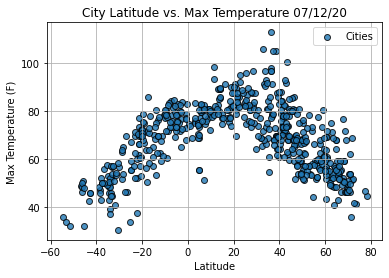

In [53]:
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, alpha=0.8, marker="o", label="Cities") 

# Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

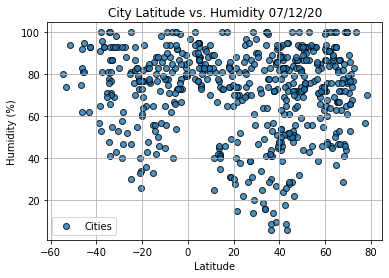

In [55]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, alpha=0.8, marker="o", label="Cities") 

# Incorporate other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

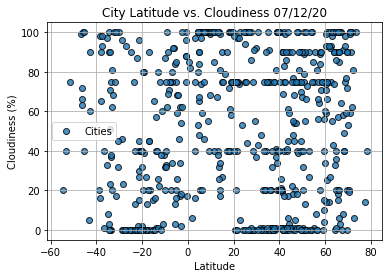

In [56]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, alpha=0.8, marker="o", label="Cities") 

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

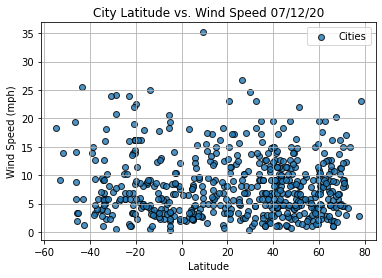

In [57]:
# Build the scatter plot for latitude vs wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, alpha=0.8, marker="o", label="Cities") 

# Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()